In [1]:
#Import necessory libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the CSV data here and print head
df = pd.read_csv('breast cancer.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#print summary
print ('Shape        ------>', df.shape)
print ('Each Column and data type and its count','\n')
print ( df.info())

Shape        ------> (569, 32)
Each Column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  

In [4]:
#DROP ALERT 1 : Unnamed:32 column has all nulls. Safe to remove the column.
df = df.drop(['Unnamed: 32'],axis=1)

In [5]:
# Dataframe statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Seems no other cols have nulls. It's safe to proceed.

In [6]:

print ('Belign Tumor (B)    =>',df.diagnosis.value_counts()[0])
print ('Malignant Tumor (M) =>',df.diagnosis.value_counts()[1])


Belign Tumor (B)    => 357
Malignant Tumor (M) => 212


Dataset is not imbalanced, we are good to proceed.

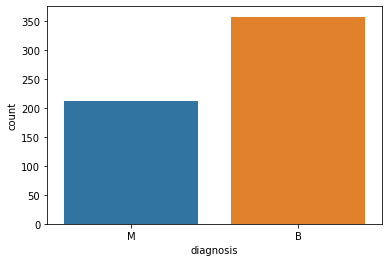

In [7]:
#Plot each class freequency
sns.countplot(x='diagnosis',data=df)
plt.show()

In [11]:
df.shape

(569, 31)

In [9]:
# Removing outliers using Z score

In [16]:
df1 = df.drop(['diagnosis'],axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df1))
print(z)

[[1.09706398 2.07333501 1.26993369 ... 2.29607613 2.75062224 1.93701461]
 [1.82982061 0.35363241 1.68595471 ... 1.0870843  0.24388967 0.28118999]
 [1.57988811 0.45618695 1.56650313 ... 1.95500035 1.152255   0.20139121]
 ...
 [0.70228425 2.0455738  0.67267578 ... 0.41406869 1.10454895 0.31840916]
 [1.83834103 2.33645719 1.98252415 ... 2.28998549 1.91908301 2.21963528]
 [1.80840125 1.22179204 1.81438851 ... 1.74506282 0.04813821 0.75120669]]


In [19]:
print ('Row numbers    \n ',np.where(z > 3)[0])
print ('\n\nColumn numbers \n ',np.where(z > 3)[1])

Row numbers    
  [  0   3   3   3   3   3   3   3   3   9   9   9  12  12  12  12  12  14
  14  23  25  31  31  35  42  42  42  60  68  68  68  68  71  71  71  71
  72  78  78  78  78  78  82  82  82  82  82  82  82  83 105 105 108 108
 108 108 108 108 112 112 116 119 119 122 122 122 122 122 122 122 122 122
 122 122 122 122 122 122 138 138 146 146 146 151 151 152 152 152 152 152
 152 176 176 180 180 180 180 180 180 180 181 181 190 190 190 190 190 192
 202 203 212 212 212 212 212 212 212 213 213 213 213 213 219 219 232 236
 236 239 239 258 258 258 259 259 265 265 265 265 265 288 288 290 290 314
 314 318 323 339 339 345 351 352 352 352 352 352 352 352 352 368 368 370
 376 376 376 379 379 379 388 389 400 416 417 417 430 461 461 461 461 461
 461 461 461 461 461 461 473 503 503 503 503 503 503 504 504 505 505 521
 521 521 557 559 561 562 562 562 567 567 567 567 568]


Column numbers 
  [ 5  4  5  9 18 24 25 28 29 25 26 29 11 12 15 17 19 25 29 23  8 28 29 28
 15 18 25  8 15 16 17 26  9 14 1

In [20]:
index = (np.where(z > 3)[0])

In [21]:
df = df.drop(df.index[index])
df.shape

(495, 31)

In [22]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


# Using SelectKBest feature Selection method

####  SelectKBest use f_classif function to find best features, where f_classif uses ANOVA test.

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

In [24]:
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

In [25]:
best_features = SelectKBest(score_func=f_classif, k=17)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(17,'Score'))  # print 17 best features
# export selected features to .csv
df_univ_feat = feature_scores.nlargest(17,'Score')

df_univ_feat.to_csv('variable_selection.csv', index=False)

            Feature_Name       Score
22       perimeter_worst  885.034320
20          radius_worst  851.489347
7    concave points_mean  822.656614
23            area_worst  793.749507
27  concave points_worst  765.662541
2         perimeter_mean  650.547521
6         concavity_mean  644.978361
3              area_mean  617.398450
0            radius_mean  601.236825
13               area_se  462.214659
26       concavity_worst  443.663100
10             radius_se  325.009571
12          perimeter_se  304.765782
5       compactness_mean  280.311672
25     compactness_worst  255.088911
17     concave points_se  130.577096
21         texture_worst  120.616098


# Model Building

In [26]:
new_X = df[df_univ_feat.Feature_Name]

In [27]:
new_X

,perimeter_worst,radius_worst,concave points_mean,area_worst,concave points_worst,perimeter_mean,concavity_mean,area_mean,radius_mean,area_se,concavity_worst,radius_se,perimeter_se,compactness_mean,compactness_worst,concave points_se,texture_worst
id,,,,,,,,,,,,,,,,,
842517,158.8,24.99,0.07017,1956.0,0.1860,132.90,0.08690,1326.0,20.57,74.08,0.2416,0.5435,3.398,0.07864,0.1866,0.01340,23.41
84300903,152.5,23.57,0.12790,1709.0,0.2430,130.00,0.19740,1203.0,19.69,94.03,0.4504,0.7456,4.585,0.15990,0.4245,0.02058,25.53
84358402,152.2,22.54,0.10430,1575.0,0.1625,135.10,0.19800,1297.0,20.29,94.44,0.4000,0.7572,5.438,0.13280,0.2050,0.01885,16.67
843786,103.4,15.47,0.08089,741.6,0.1741,82.57,0.15780,477.1,12.45,27.19,0.5355,0.3345,2.217,0.17000,0.5249,0.01137,23.75
844359,153.2,22.88,0.07400,1606.0,0.1932,119.60,0.11270,1040.0,18.25,53.91,0.3784,0.4467,3.180,0.10900,0.2576,0.01039,27.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925292,100.2,15.30,0.04304,706.7,0.1048,91.38,0.04462,600.4,14.05,29.84,0.1326,0.3645,2.888,0.11260,0.2264,0.01626,33.17
926125,179.1,24.29,0.14740,1819.0,0.2542,143.00,0.31740,1347.0,20.92,118.80,0.6599,0.9622,8.758,0.22360,0.4186,0.02624,29.41
926424,166.1,25.45,0.13890,2027.0,0.2216,142.00,0.24390,1479.0,21.56,158.70,0.4107,1.1760,7.673,0.11590,0.2113,0.02454,26.40


In [28]:
# Buidling model to test unexposed data
x_train,x_test,y_train,y_test = train_test_split(new_X,y,test_size = 0.25, random_state= 355)

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [29]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[74,  3],
       [ 9, 38]], dtype=int64)

In [30]:
print (classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           B       0.89      0.96      0.92        77
           M       0.93      0.81      0.86        47

    accuracy                           0.90       124
   macro avg       0.91      0.88      0.89       124
weighted avg       0.90      0.90      0.90       124

